# **IMPORTING LIBRARY**

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt

# **SPLITING MNIST DATA IN TRAIN AND TEST**

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# **PLOTING COUNT PLOT**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


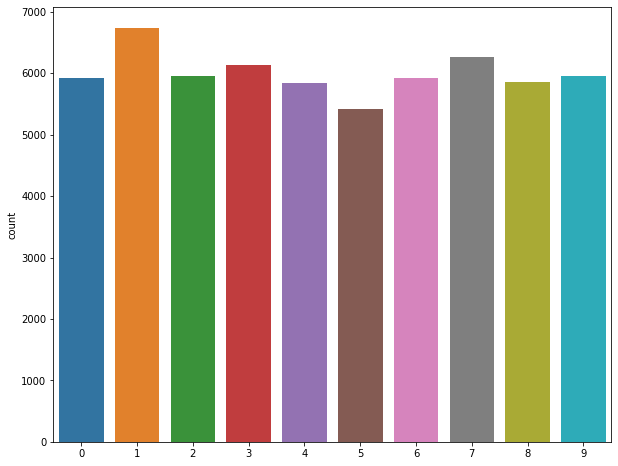

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(y_train)

# **IMAGE VISUALISING**

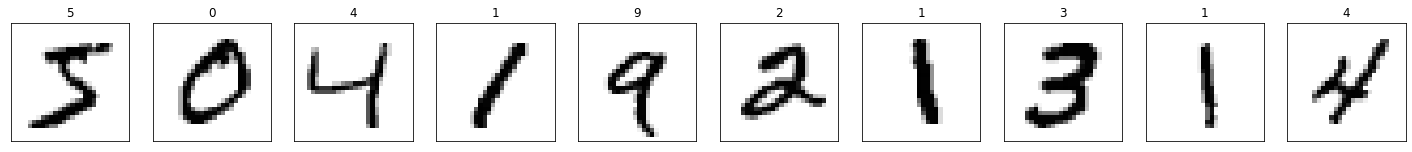

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False, 
    sharey=True, figsize=(25,25))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# **PRE-PROCESSING DATA**

In [ ]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [26]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

## **INITIALLY WE HAVE BUILD A MODEL ARCHITECTURE AND THEN DEFINING ITS BASE ON DATASET THEN WE WILL ADD BELOW MENTION LAYERS.**
1. CONV2D - FOR THE CONVOLUTION LAYERS
2. DROPOUT - TO PREVENT FROM OVERFITTING
3. DENSE - FULLY CONNECTED  LAYERS
4. SOFTMAX ACTIVATION - This is used to convert all predictions into probability The model architecture can be tuned to get optimal performance.
5. FOR THIS WE HAVE TO IMPORT LIBRARY

# **IMPORTING REQUIRED LIBRARY**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [14]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

# **TRAINING OUR MODEL**

In [15]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=6)

Epoch 1/6
1688/1688 [==============================] - 607s 359ms/step - loss: 0.2898 - accuracy: 0.9159 - val_loss: 0.0736 - val_accuracy: 0.9830
Epoch 2/6
1688/1688 [==============================] - 604s 358ms/step - loss: 0.1109 - accuracy: 0.9681 - val_loss: 0.0953 - val_accuracy: 0.9805
Epoch 3/6
1688/1688 [==============================] - 605s 358ms/step - loss: 0.0924 - accuracy: 0.9725 - val_loss: 0.0901 - val_accuracy: 0.9828
Epoch 4/6
1688/1688 [==============================] - 601s 356ms/step - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.0993 - val_accuracy: 0.9832
Epoch 5/6
1688/1688 [==============================] - 604s 358ms/step - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0847 - val_accuracy: 0.9862
Epoch 6/6
1688/1688 [==============================] - 605s 359ms/step - loss: 0.0642 - accuracy: 0.9816 - val_loss: 0.0863 - val_accuracy: 0.9858


# **SAVING MODEL**

In [16]:
model.save('MNISTPROJECT.h5')

# **LOADING THE MODEL**

In [17]:
from tensorflow.keras.models import load_model
model = load_model('MNISTPROJECT.h5')

# **EVALUATING OUR MODEL**

In [18]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 22s 71ms/step - loss: 3.2542 - accuracy: 0.9855
Test Loss 3.254185914993286
Test Accuracy 0.9854999780654907


# **PLOTING TRAINING AND VALIDATION PLOTS**

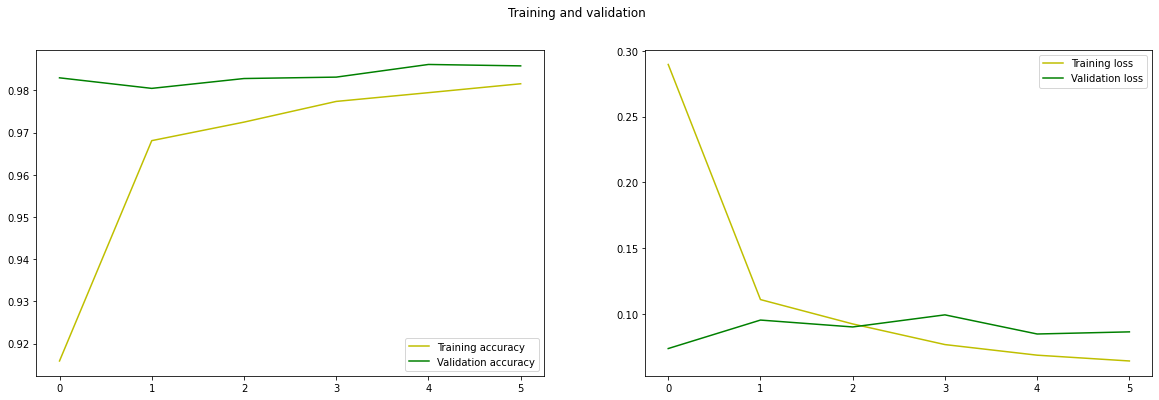

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)
plt.suptitle('Training and validation')
plt.show()

In [20]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    0,    1,    1,    1,    0,    0],
       [   2, 1113,    7,    0,    0,    3,    4,    4,    2,    0],
       [   0,    0, 1027,    1,    0,    0,    0,    4,    0,    0],
       [   0,    0,    4,  992,    0,    8,    0,    5,    1,    0],
       [   0,    0,    1,    0,  978,    0,    0,    0,    2,    1],
       [   0,    0,    0,    5,    0,  882,    1,    1,    1,    2],
       [   6,    1,    1,    0,    2,   12,  933,    0,    3,    0],
       [   1,    0,   15,    0,    0,    0,    0, 1009,    1,    2],
       [   1,    0,    4,    1,    0,    2,    0,    0,  965,    1],
       [   2,    0,    0,    0,    8,    2,    0,    6,   12,  979]],
      dtype=int32)>

# **PLOTING HEAT MAP**

Text(69.0, 0.5, 'Truth')

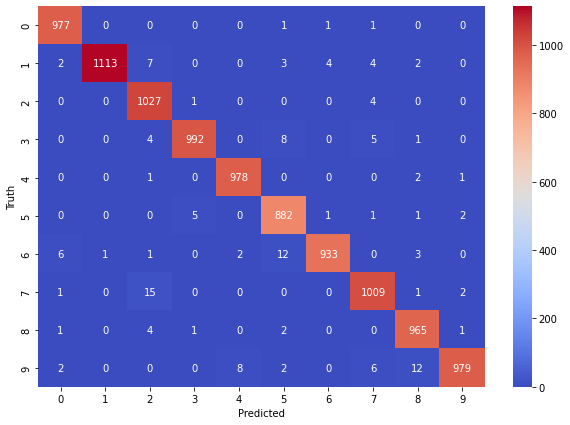

In [21]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')